# Welter issue #5
## Predict Teff vs order
### Part 3- MEASURED values in K-Band *and* optical.

Michael Gully-Santiago  
Monday, January 4, 2016  

We have optical values now.

In [1]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
from astropy.io import fits
import matplotlib.pyplot as plt

In [2]:
% matplotlib inline
% config InlineBackend.figure_format = 'retina'
import seaborn as sns
sns.set_context('notebook')

In [3]:
import h5py

In [4]:
import pandas as pd

### We need the meta data about the optical spectral orders 

In [24]:
start_wl = []
end_wl = []
center_wl = []
ord_name = []

for o in range(0, 34+1):
    f = h5py.File('../data/reduced/optical/LkCa4_ESPaDOnS_eo{:03d}.hdf5'.format(o), 'r')
    this_wl = (f['wls'][0] + f['wls'][-1])/2.0
    start_wl.append(f['wls'][0])
    end_wl.append(f['wls'][-1])
    center_wl.append(this_wl)
    ord_name.append('{:03d}'.format(o))
    f.close()

In [25]:
opt_ords = pd.DataFrame({"wl_start":start_wl, "wl_end":end_wl, "wl_center":center_wl, 
                         "number":range(0,34+1), "m_val":ord_name})
opt_ords.head()

,m_val,number,wl_center,wl_end,wl_start
0,000,0,5180.62500,5199.9292,5161.3208
1,001,1,5231.25700,5262.5311,5199.9829
2,002,2,5294.98655,5327.4005,5262.5726
3,003,3,5360.99580,5394.5496,5327.4420
4,004,4,5429.35055,5464.0826,5394.6185


There is technically no `m_val`, since we don't know the $m$ of the spectrograph.  But we will just use the relative order number, $o$, as $m$ for now.

## Actual data

You can have pandas read the clipboard if you copy the output from the terminal.  Saves a step of copying files over, at the expense of reproducibility...

```python
sf_dat = pd.read_clipboard(names=dat_names, sep=r',\s+', squeeze=True)

sf_dat.to_csv('../data/analysis/run02_by_order.csv', index=False)
```

In [26]:
dat_names = ['m_val', 
              'Teff_05p', 'Teff_50p', 'Teff_95p',
              'logg_05p', 'logg_50p', 'logg_95p',
              'FeH_05p', 'FeH_50p', 'FeH_95p',
              'vz_05p', 'vz_50p', 'vz_95p',
              'vi_05p', 'vi_50p', 'vi_95p',
              'logO_05p', 'logO_50p', 'logO_95p',
              'c1_05p', 'c1_50p', 'c1_95p',
              'c2_05p', 'c2_50p', 'c2_95p',
              'c3_05p', 'c3_50p', 'c3_95p',
              'SA_05p', 'SA_50p', 'SA_95p',
              'LA_05p', 'LA_50p', 'LA_95p',
              'll_05p', 'll_50p', 'll_95p']

In [27]:
#sf_dat = pd.read_clipboard(names=dat_names, sep=r',\s+', squeeze=True)
#sf_dat.to_csv('../data/analysis/optical_run01_by_order.csv', index=False)

In [28]:
sf_dat = pd.read_csv('../data/analysis/optical_run01_by_order.csv')

In [29]:
sf_dat.head()

,m_val,Teff_05p,Teff_50p,Teff_95p,logg_05p,logg_50p,logg_95p,FeH_05p,FeH_50p,FeH_95p,...,c3_95p,SA_05p,SA_50p,SA_95p,LA_05p,LA_50p,LA_95p,ll_05p,ll_50p,ll_95p
0,000,3671.597583,3734.931152,3918.759131,3.757152,3.929592,3.994423,-0.463656,-0.428606,-0.400503,...,0.046281,4.130559,4.424212,4.735918,-1.030014,-0.915195,-0.820424,56.789884,72.114952,82.728920
1,001,3910.707983,3991.772217,4062.312549,3.531365,3.655367,3.725883,-0.496564,-0.470180,-0.392512,...,0.008755,3.515317,3.773452,4.024213,-1.249743,-1.176541,-1.078180,35.295181,41.962921,52.413920
2,002,3850.192407,3990.523193,4186.905322,3.815876,3.936076,3.993867,-0.497735,-0.477813,-0.439976,...,0.024003,3.121204,3.315826,3.529300,-1.314615,-1.223884,-1.141970,36.250294,46.100685,56.028513
3,003,3846.459961,3923.694824,3995.909888,3.585957,3.762359,3.920494,-0.498359,-0.482631,-0.450786,...,-0.048272,2.058792,2.182574,2.324363,-1.328933,-1.267863,-1.195140,37.950161,43.088070,49.906529
4,004,3727.496973,3812.548828,3867.507104,3.572361,3.817147,3.969211,-0.498434,-0.476843,-0.402908,...,0.002481,2.110130,2.260994,2.406161,-1.200368,-1.147594,-1.093094,44.042196,48.723873,53.670507


In [48]:
sf_dat.dropna(inplace=True)
sf_dat['m_int'] = sf_dat['m_val'].astype(int)

In [49]:
merged = pd.merge(opt_ords, sf_dat, left_on='number', right_on='m_int', how='outer')
merged.head()

,m_val_x,number,wl_center,wl_end,wl_start,m_val_y,Teff_05p,Teff_50p,Teff_95p,logg_05p,...,SA_05p,SA_50p,SA_95p,LA_05p,LA_50p,LA_95p,ll_05p,ll_50p,ll_95p,m_int
0,000,0,5180.62500,5199.9292,5161.3208,000,3671.597583,3734.931152,3918.759131,3.757152,...,4.130559,4.424212,4.735918,-1.030014,-0.915195,-0.820424,56.789884,72.114952,82.728920,0
1,001,1,5231.25700,5262.5311,5199.9829,001,3910.707983,3991.772217,4062.312549,3.531365,...,3.515317,3.773452,4.024213,-1.249743,-1.176541,-1.078180,35.295181,41.962921,52.413920,1
2,002,2,5294.98655,5327.4005,5262.5726,002,3850.192407,3990.523193,4186.905322,3.815876,...,3.121204,3.315826,3.529300,-1.314615,-1.223884,-1.141970,36.250294,46.100685,56.028513,2
3,003,3,5360.99580,5394.5496,5327.4420,003,3846.459961,3923.694824,3995.909888,3.585957,...,2.058792,2.182574,2.324363,-1.328933,-1.267863,-1.195140,37.950161,43.088070,49.906529,3
4,004,4,5429.35055,5464.0826,5394.6185,004,3727.496973,3812.548828,3867.507104,3.572361,...,2.110130,2.260994,2.406161,-1.200368,-1.147594,-1.093094,44.042196,48.723873,53.670507,4


## Plot of $T_{eff}$ vs. spectral order

In [50]:
orders= opt_ords

In [51]:
N_orders = len(orders.wl_start)

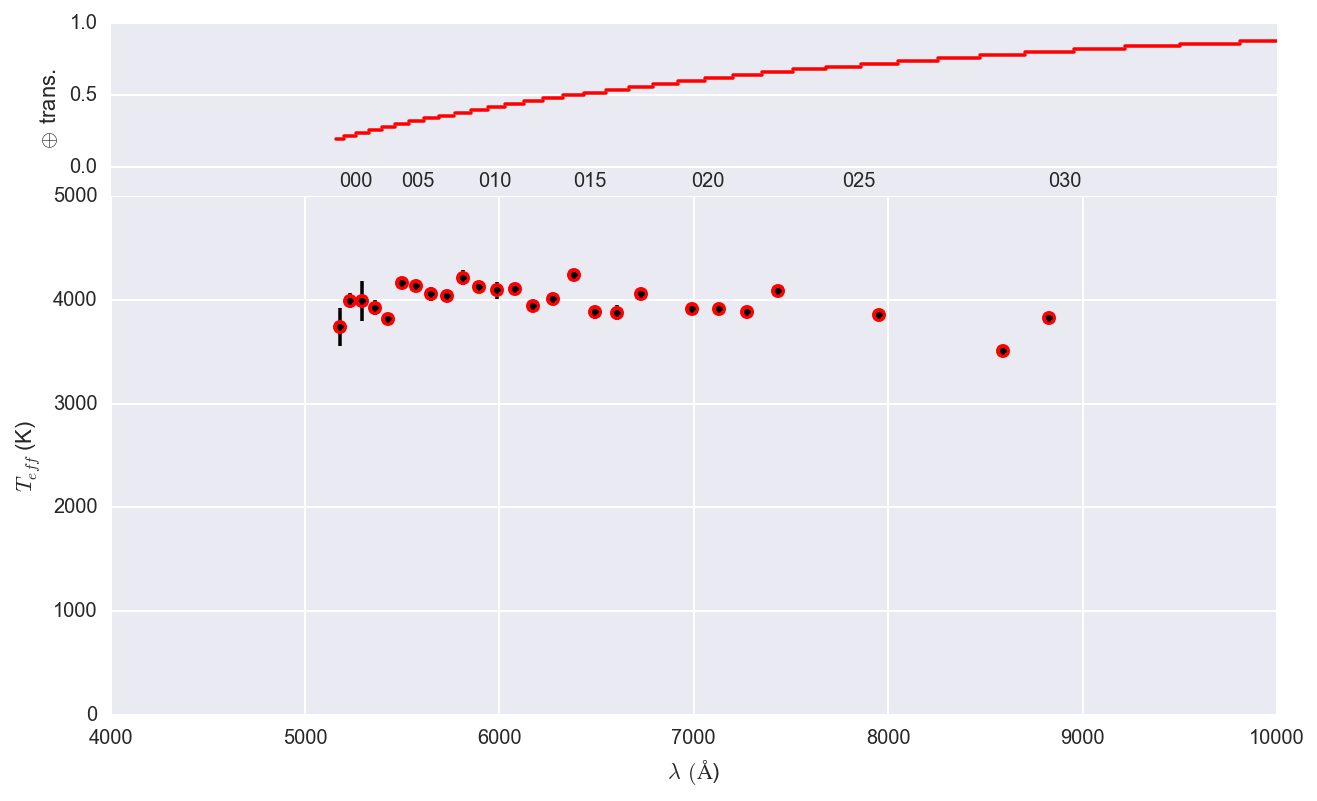

In [65]:

#plt.subplot(211)
fig = plt.figure(figsize=(18, 6))
ax1 = fig.add_axes([0.35, 0.7, 0.45, 0.2],xticks=[], yticks=[0.0, 0.5, 1])
#ax1.fill_between(tell.wls, tell.trans, y2=1.0, alpha=0.5)
ax1.set_xlim(4000, 10000)
ax1.set_ylim(-0.2, 1)
ax1.set_ylabel('$\oplus$ trans.')
for i in range(N_orders):
    x = [orders.wl_start[i], orders.wl_end[i]]
    y = [0.2+0.02*i]*2
    ax1.plot(x, y, 'r-')
    
#text_pos = 500.0 + 20.0*np.arange(N_orders)    
for i in range(N_orders):
    if (orders.number.values[i] % 5) == 0:
        ax1.text(orders.wl_center[i], -0.13, '{}'.format(orders.m_val.values[i]))
    
    
ax = fig.add_axes([0.35, 0.1, 0.45, 0.6])

ax.plot(merged.wl_center, merged.Teff_50p, 'ro')
yerr = merged.Teff_95p - merged.Teff_50p
ax.errorbar(merged.wl_center, merged.Teff_50p, yerr=yerr, fmt='k.')


ax.set_ylim(0, 5000)
ax.set_xlim(4000, 10000)
ax.set_ylabel('$T_{eff}$ (K)')
ax.set_xlabel('$\lambda \,(\AA $)')
ax.legend(loc='best')

#plt.savefig('../document/figures/teff_vs_order.pdf', bbox_inches='tight')

## Plot of $\log{g}$ vs. spectral order

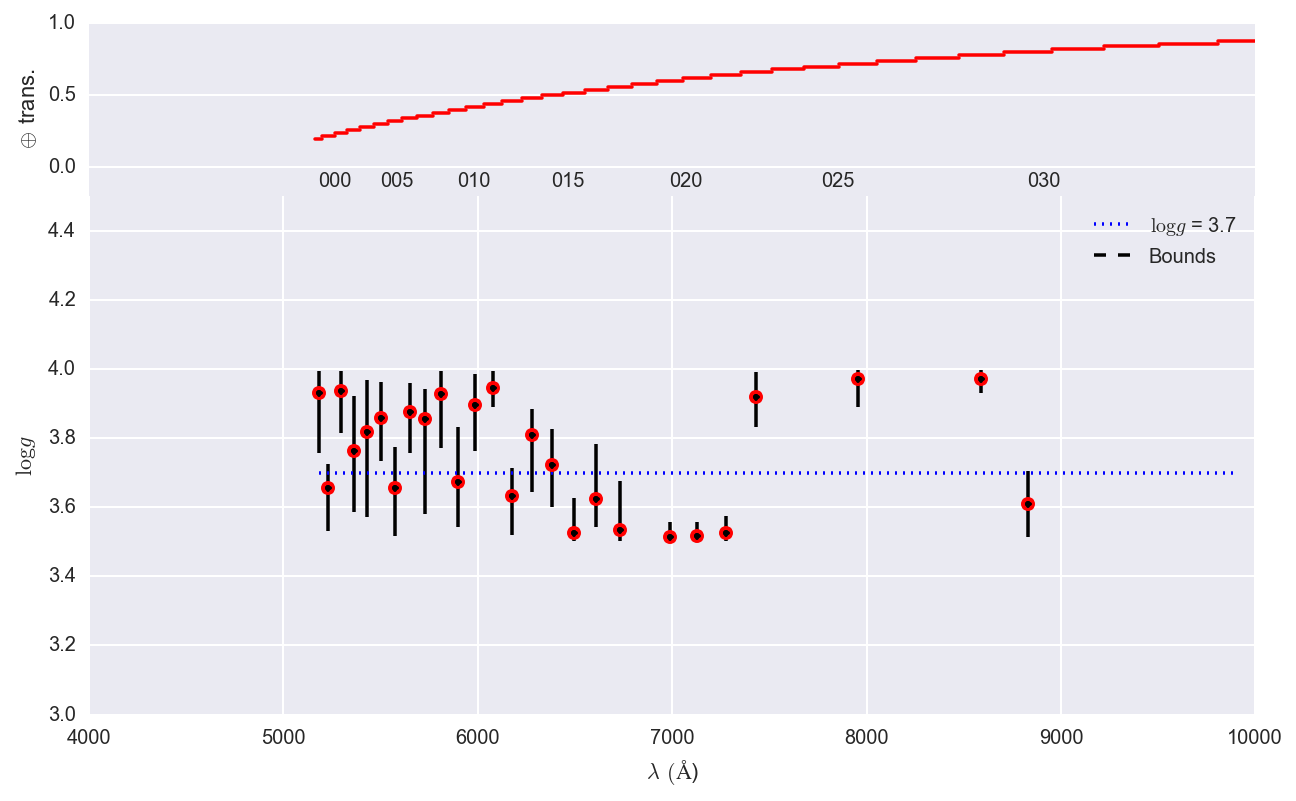

In [67]:

#plt.subplot(211)
fig = plt.figure(figsize=(18, 6))
ax1 = fig.add_axes([0.35, 0.7, 0.45, 0.2],xticks=[], yticks=[0.0, 0.5, 1])
#ax1.fill_between(tell.wls, tell.trans, y2=1.0, alpha=0.5)
ax1.set_xlim(4000, 10000)
ax1.set_ylim(-0.2, 1)
ax1.set_ylabel('$\oplus$ trans.')
for i in range(N_orders):
    x = [orders.wl_start[i], orders.wl_end[i]]
    y = [0.2+0.02*i]*2
    ax1.plot(x, y, 'r-')
    
#text_pos = 500.0 + 20.0*np.arange(N_orders)    
for i in range(N_orders):
    if (orders.number.values[i] % 5) == 0:
        ax1.text(orders.wl_center[i], -0.13, '{}'.format(orders.m_val.values[i]))

ax = fig.add_axes([0.35, 0.1, 0.45, 0.6])

log_g_mean = 3.7
lglabel = "$\log{g}$" +" = {} ".format(log_g_mean)
ax.plot(orders.wl_center, [3.7]*len(orders.wl_center), 'b:', label=lglabel)

ax.plot([10000, 30000], [3.5]*2, 'k--', label='Bounds')
ax.plot([10000, 30000], [4.0]*2, 'k--')

ax.plot(merged.wl_center, merged.logg_50p, 'ro')
yerr1 = merged.logg_50p - merged.logg_05p
yerr2 = merged.logg_95p - merged.logg_50p
ax.errorbar(merged.wl_center, merged.logg_50p, yerr=[yerr1, yerr2], fmt='k.')


ax.set_ylim(3.0, 4.5)
ax.set_xlim(4000, 10000)
ax.set_ylabel('$\log{g}$')
ax.set_xlabel('$\lambda \,(\AA $)')
ax.legend(loc='best')

#plt.savefig('../document/figures/logg_vs_order.pdf', bbox_inches='tight')

## Plot of $[\mathrm{Fe}/\mathrm{H}]$ vs. spectral order

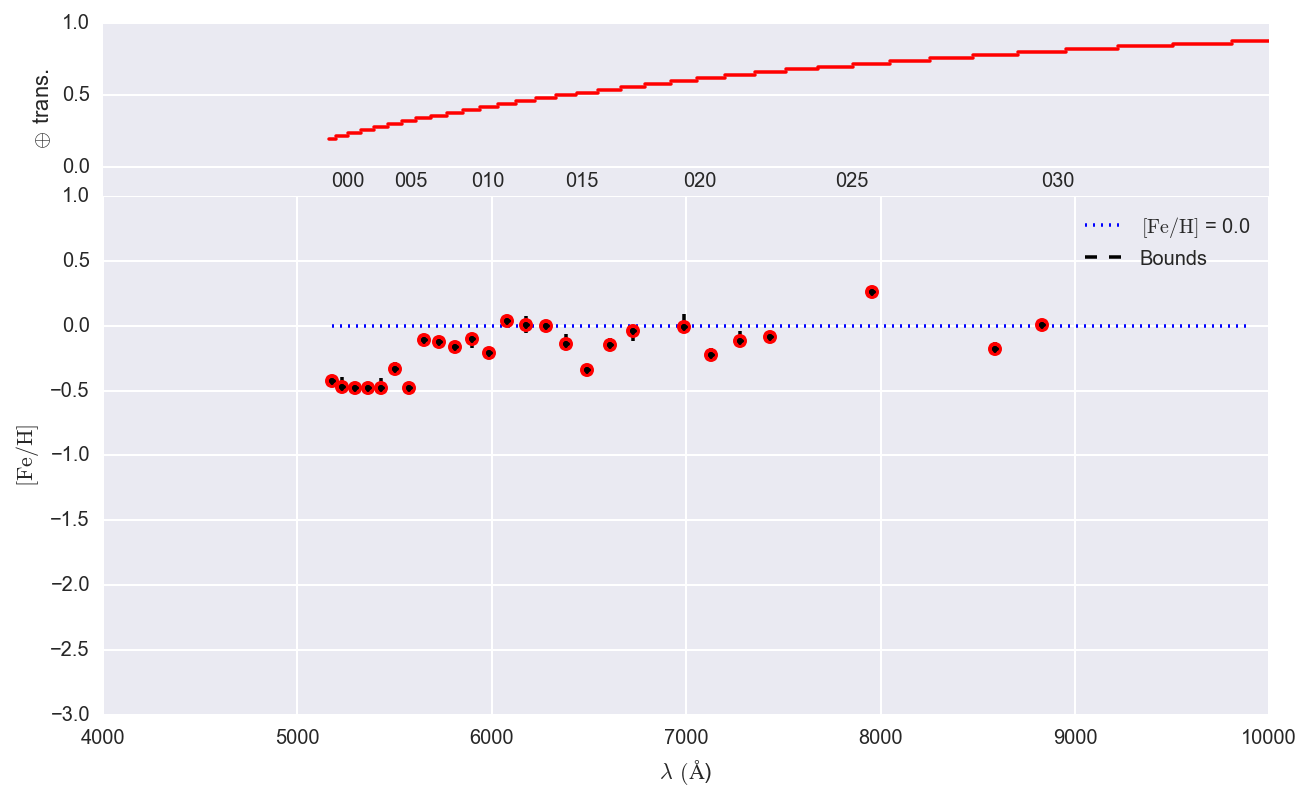

In [68]:

#plt.subplot(211)
fig = plt.figure(figsize=(18, 6))
ax1 = fig.add_axes([0.35, 0.7, 0.45, 0.2],xticks=[], yticks=[0.0, 0.5, 1])
#ax1.fill_between(tell.wls, tell.trans, y2=1.0, alpha=0.5)
ax1.set_xlim(4000, 10000)
ax1.set_ylim(-0.2, 1)
ax1.set_ylabel('$\oplus$ trans.')
for i in range(N_orders):
    x = [orders.wl_start[i], orders.wl_end[i]]
    y = [0.2+0.02*i]*2
    ax1.plot(x, y, 'r-')
    
for i in range(N_orders):
    if (orders.number.values[i] % 5) == 0:
        ax1.text(orders.wl_center[i], -0.13, '{}'.format(orders.m_val.values[i]))

ax = fig.add_axes([0.35, 0.1, 0.45, 0.6])

feh_mean = 0.0
fehlabel = "$[\mathrm{Fe}/\mathrm{H}]$" +" = {} ".format(feh_mean)
ax.plot(orders.wl_center, [feh_mean]*len(orders.wl_center), 'b:', label=fehlabel)

ax.plot([10000, 30000], [-0.5]*2, 'k--', label='Bounds')
ax.plot([10000, 30000], [0.5]*2, 'k--')

ax.plot(merged.wl_center, merged.FeH_50p, 'ro')
yerr1 = merged.FeH_50p - merged.FeH_05p
yerr2 = merged.FeH_95p - merged.FeH_50p
ax.errorbar(merged.wl_center, merged.FeH_50p, yerr=[yerr1, yerr2], fmt='k.')


ax.set_ylim(-3.0, 1.0)
ax.set_xlim(4000, 10000)
ax.set_ylabel('$[\mathrm{Fe}/\mathrm{H}]$')
ax.set_xlabel('$\lambda \,(\AA $)')
ax.legend(loc='best')

#plt.savefig('../document/figures/logg_vs_order.pdf', bbox_inches='tight')

## Plot of $RV$ vs. spectral order

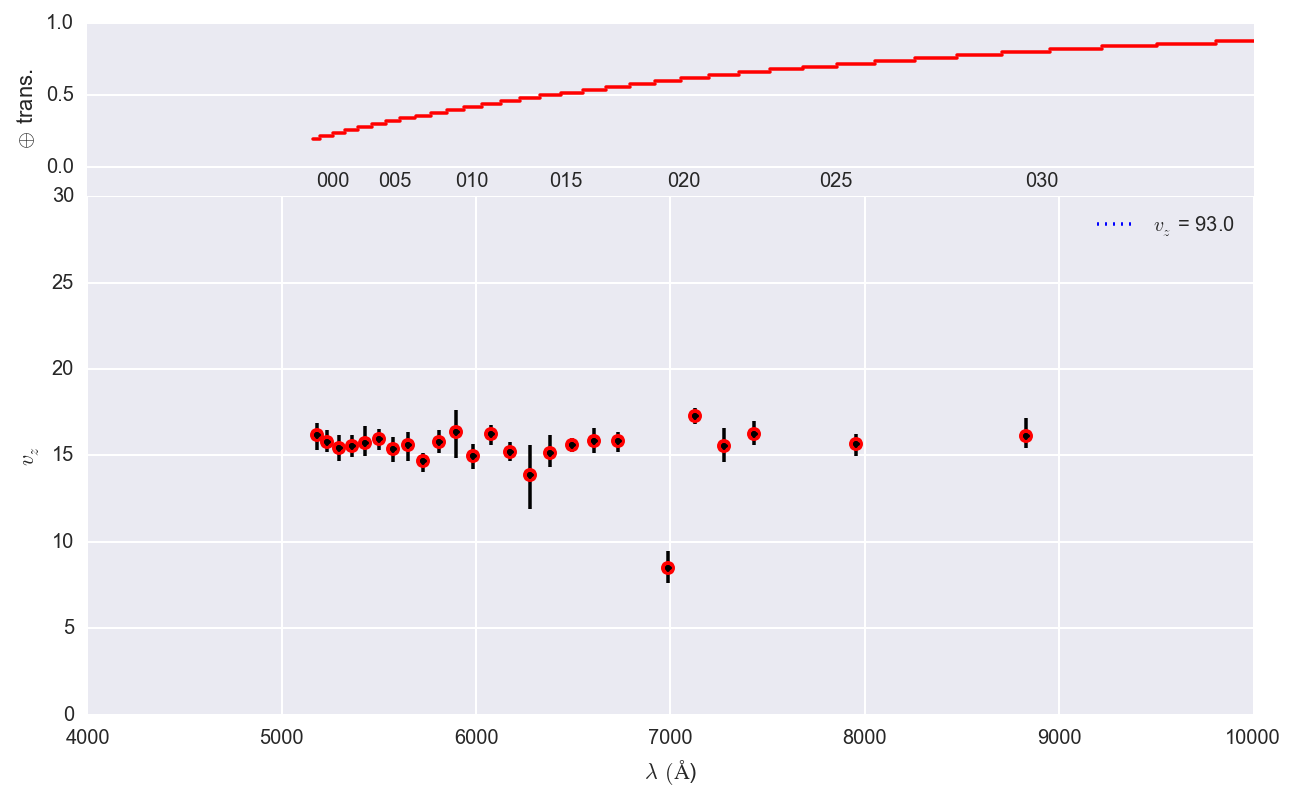

In [72]:

#plt.subplot(211)
fig = plt.figure(figsize=(18, 6))
ax1 = fig.add_axes([0.35, 0.7, 0.45, 0.2],xticks=[], yticks=[0.0, 0.5, 1])
#ax1.fill_between(tell.wls, tell.trans, y2=1.0, alpha=0.5)
ax1.set_xlim(4000, 10000)
ax1.set_ylim(-0.2, 1)
ax1.set_ylabel('$\oplus$ trans.')
for i in range(N_orders):
    x = [orders.wl_start[i], orders.wl_end[i]]
    y = [0.2+0.02*i]*2
    ax1.plot(x, y, 'r-')
    
for i in range(N_orders):
    if (orders.number.values[i] % 5) == 0:
        ax1.text(orders.wl_center[i], -0.13, '{}'.format(orders.m_val.values[i]))

ax = fig.add_axes([0.35, 0.1, 0.45, 0.6])

this_mean = 93.0
thislabel = "$v_z$" +" = {} ".format(this_mean)
ax.plot([10000, 30000], [this_mean]*2, 'b:', label=thislabel)


ax.plot(merged.wl_center, merged.vz_50p, 'ro')
yerr1 = merged.vz_50p - merged.vz_05p
yerr2 = merged.vz_95p - merged.vz_50p
ax.errorbar(merged.wl_center, merged.vz_50p, yerr=[yerr1, yerr2], fmt='k.')


ax.set_ylim(0, 30)
ax.set_xlim(4000, 10000)
ax.set_ylabel('$v_z$')
ax.set_xlabel('$\lambda \,(\AA $)')
ax.legend(loc='best')

#plt.savefig('../document/figures/logg_vs_order.pdf', bbox_inches='tight')

Vsini

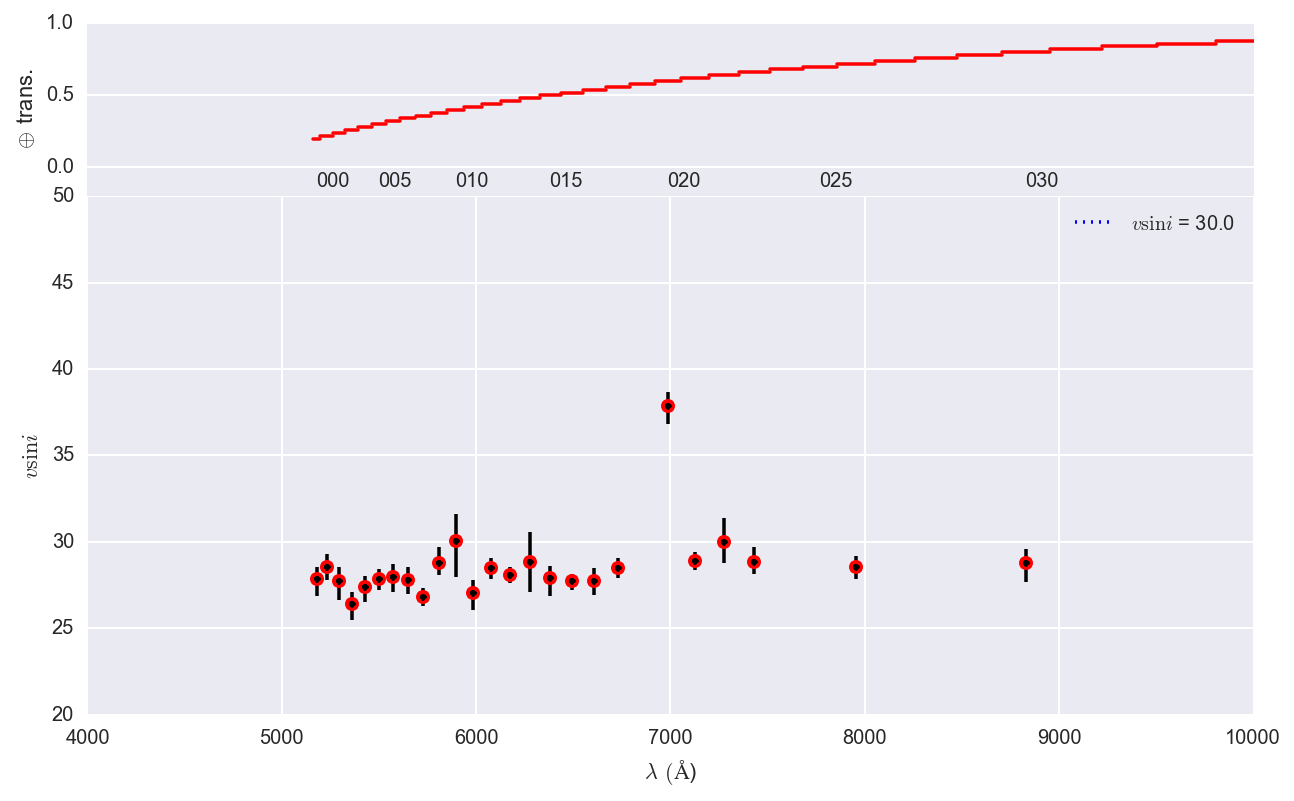

In [73]:

#plt.subplot(211)
fig = plt.figure(figsize=(18, 6))
ax1 = fig.add_axes([0.35, 0.7, 0.45, 0.2],xticks=[], yticks=[0.0, 0.5, 1])
#ax1.fill_between(tell.wls, tell.trans, y2=1.0, alpha=0.5)
ax1.set_xlim(4000, 10000)
ax1.set_ylim(-0.2, 1)
ax1.set_ylabel('$\oplus$ trans.')
for i in range(N_orders):
    x = [orders.wl_start[i], orders.wl_end[i]]
    y = [0.2+0.02*i]*2
    ax1.plot(x, y, 'r-')
    
for i in range(N_orders):
    if (orders.number.values[i] % 5) == 0:
        ax1.text(orders.wl_center[i], -0.13, '{}'.format(orders.m_val.values[i]))

ax = fig.add_axes([0.35, 0.1, 0.45, 0.6])

this_mean = 30.0
thislabel = "$v\sin{i}$" +" = {} ".format(this_mean)
ax.plot([10000, 30000], [this_mean]*2, 'b:', label=thislabel)


ax.plot(merged.wl_center, merged.vi_50p, 'ro')
yerr1 = merged.vi_50p - merged.vi_05p
yerr2 = merged.vi_95p - merged.vi_50p
ax.errorbar(merged.wl_center, merged.vi_50p, yerr=[yerr1, yerr2], fmt='k.')


ax.set_ylim(20, 50)
ax.set_xlim(4000, 10000)
ax.set_ylabel('$v \sin{i}$')
ax.set_xlabel('$\lambda \,(\AA $)')
ax.legend(loc='best')

#plt.savefig('../document/figures/logg_vs_order.pdf', bbox_inches='tight')

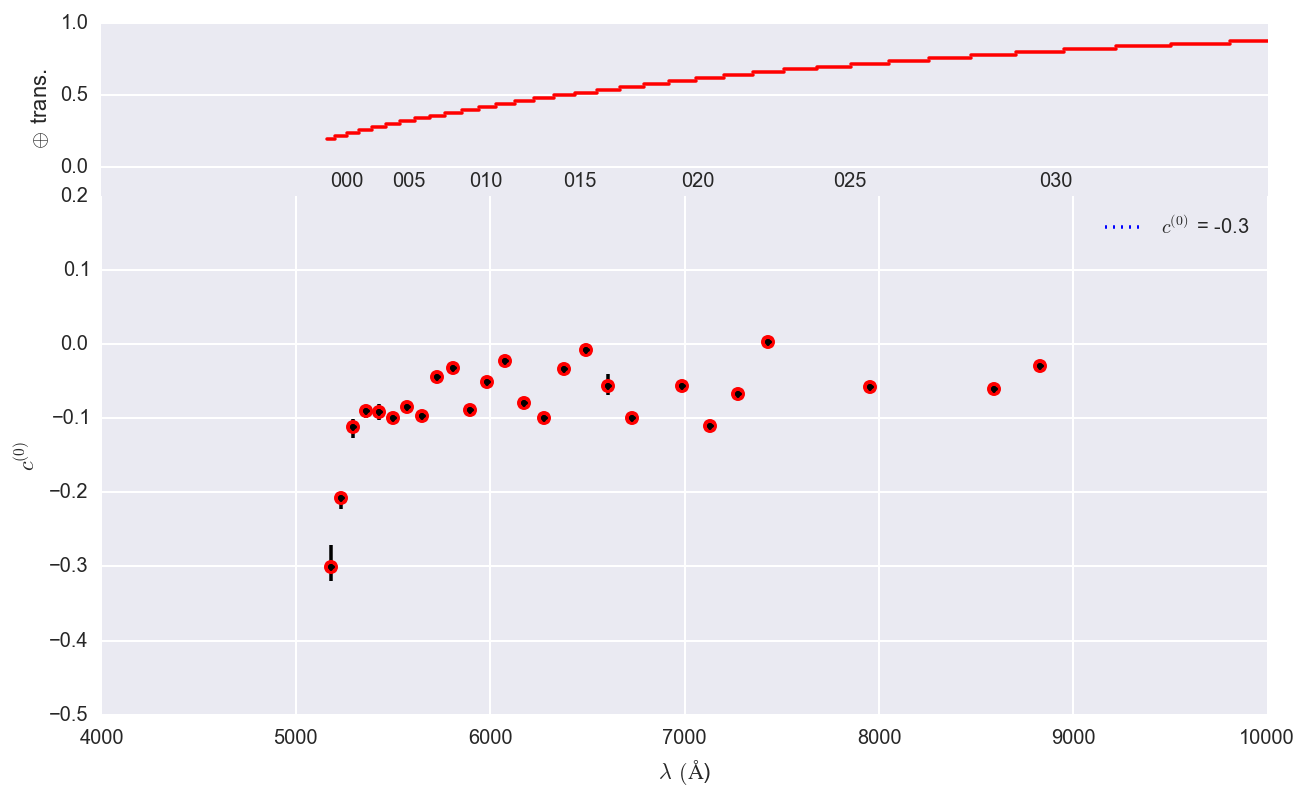

In [78]:
fig = plt.figure(figsize=(18, 6))
ax1 = fig.add_axes([0.35, 0.7, 0.45, 0.2],xticks=[], yticks=[0.0, 0.5, 1])
ax1.set_xlim(4000, 10000)
ax1.set_ylim(-0.2, 1)
ax1.set_ylabel('$\oplus$ trans.')
for i in range(N_orders):
    x = [orders.wl_start[i], orders.wl_end[i]]
    y = [0.2+0.02*i]*2
    ax1.plot(x, y, 'r-')
    
for i in range(N_orders):
    if (orders.number.values[i] % 5) == 0:
        ax1.text(orders.wl_center[i], -0.13, '{}'.format(orders.m_val.values[i]))

ax = fig.add_axes([0.35, 0.1, 0.45, 0.6])

this_mean = -0.3
this_label = "$c^{(0)}$" +" = {} ".format(this_mean)
ax.plot([10000, 30000], [this_mean]*2, 'b:', label=this_label)

x = merged.wl_center
y = merged.logO_50p
y05 = merged.logO_05p
y95 = merged.logO_95p
ax.plot(x, y, 'ro')
yerr1 = y - y05
yerr2 = y95 - y
ax.errorbar(x, y, yerr=[yerr1, yerr2], fmt='k.')


ax.set_ylim(-0.5, 0.2)
ax.set_xlim(4000, 10000)
ax.set_ylabel('$c^{(0)}}$')
ax.set_xlabel('$\lambda \,(\AA $)')
ax.legend(loc='best')

#plt.savefig('../document/figures/logg_vs_order.pdf', bbox_inches='tight')

# Order-by-order calibration parameters

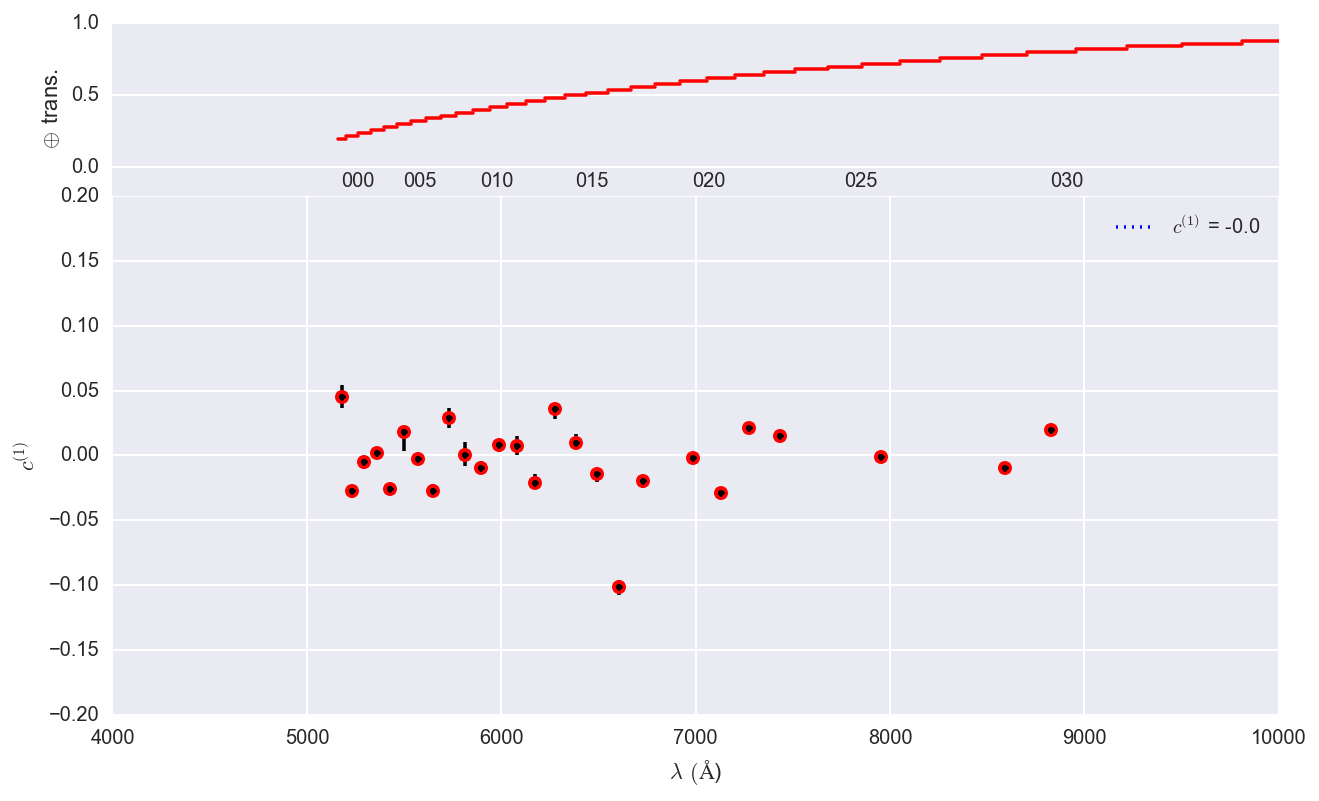

In [79]:
fig = plt.figure(figsize=(18, 6))
ax1 = fig.add_axes([0.35, 0.7, 0.45, 0.2],xticks=[], yticks=[0.0, 0.5, 1])
ax1.set_xlim(4000, 10000)
ax1.set_ylim(-0.2, 1)
ax1.set_ylabel('$\oplus$ trans.')
for i in range(N_orders):
    x = [orders.wl_start[i], orders.wl_end[i]]
    y = [0.2+0.02*i]*2
    ax1.plot(x, y, 'r-')
    
for i in range(N_orders):
    if (orders.number.values[i] % 5) == 0:
        ax1.text(orders.wl_center[i], -0.13, '{}'.format(orders.m_val.values[i]))

ax = fig.add_axes([0.35, 0.1, 0.45, 0.6])

this_mean = -0.0
this_label = "$c^{(1)}$" +" = {} ".format(this_mean)
ax.plot([10000, 30000], [this_mean]*2, 'b:', label=this_label)

x = merged.wl_center
y = merged.c1_50p
y05 = merged.c1_05p
y95 = merged.c1_95p
ax.plot(x, y, 'ro')
yerr1 = y - y05
yerr2 = y95 - y
ax.errorbar(x, y, yerr=[yerr1, yerr2], fmt='k.')


ax.set_ylim(-0.2, 0.2)
ax.set_xlim(4000, 10000)
ax.set_ylabel('$c^{(1)}}$')
ax.set_xlabel('$\lambda \,(\AA $)')
ax.legend(loc='best')

#plt.savefig('../document/figures/logg_vs_order.pdf', bbox_inches='tight')

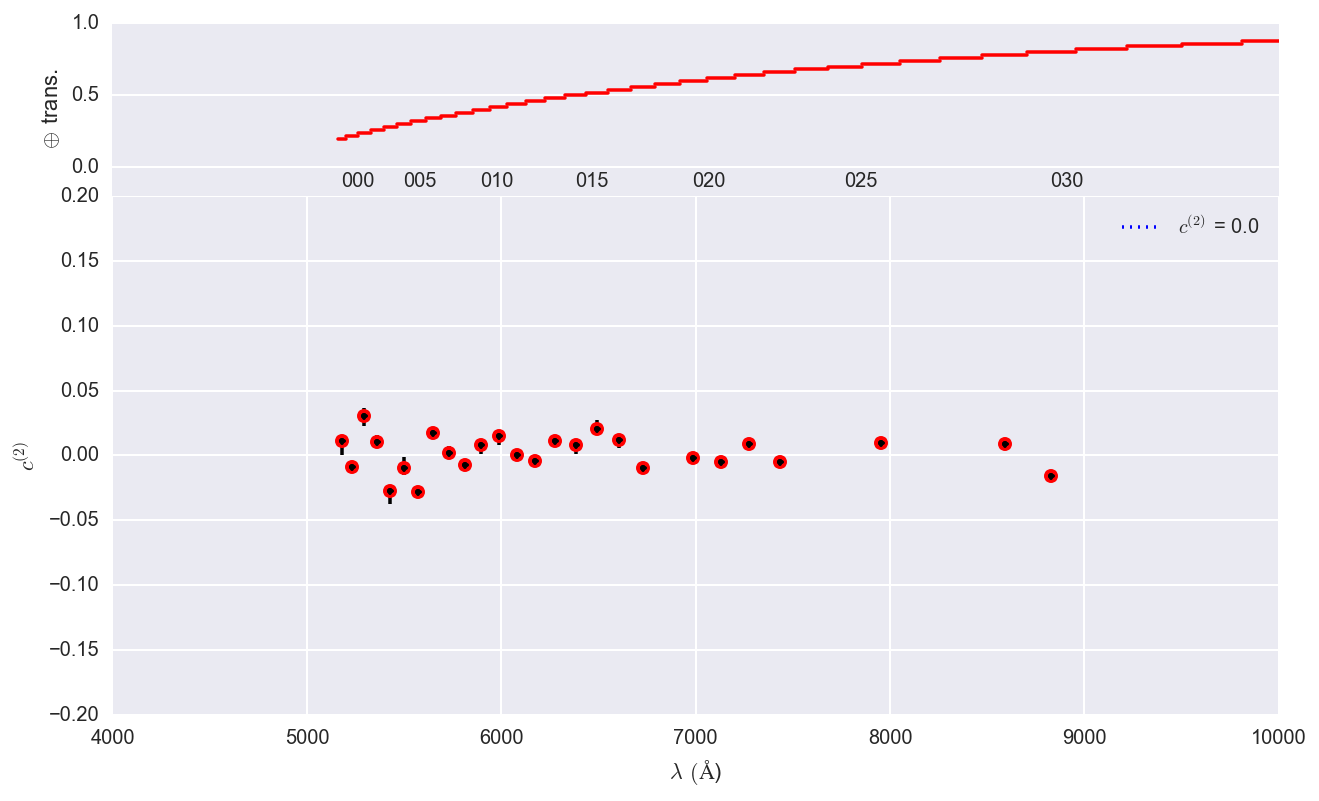

In [80]:
fig = plt.figure(figsize=(18, 6))
ax1 = fig.add_axes([0.35, 0.7, 0.45, 0.2],xticks=[], yticks=[0.0, 0.5, 1])
ax1.set_xlim(4000, 10000)
ax1.set_ylim(-0.2, 1)
ax1.set_ylabel('$\oplus$ trans.')
for i in range(N_orders):
    x = [orders.wl_start[i], orders.wl_end[i]]
    y = [0.2+0.02*i]*2
    ax1.plot(x, y, 'r-')
    
for i in range(N_orders):
    if (orders.number.values[i] % 5) == 0:
        ax1.text(orders.wl_center[i], -0.13, '{}'.format(orders.m_val.values[i]))

ax = fig.add_axes([0.35, 0.1, 0.45, 0.6])

this_mean = 0.0
this_label = "$c^{(2)}$" +" = {} ".format(this_mean)
ax.plot([10000, 30000], [this_mean]*2, 'b:', label=this_label)

x = merged.wl_center
y = merged.c2_50p
y05 = merged.c2_05p
y95 = merged.c2_95p
ax.plot(x, y, 'ro')
yerr1 = y - y05
yerr2 = y95 - y
ax.errorbar(x, y, yerr=[yerr1, yerr2], fmt='k.')


ax.set_ylim(-0.2, 0.2)
ax.set_xlim(4000, 10000)
ax.set_ylabel('$c^{(2)}}$')
ax.set_xlabel('$\lambda \,(\AA $)')
ax.legend(loc='best')

#plt.savefig('../document/figures/logg_vs_order.pdf', bbox_inches='tight')

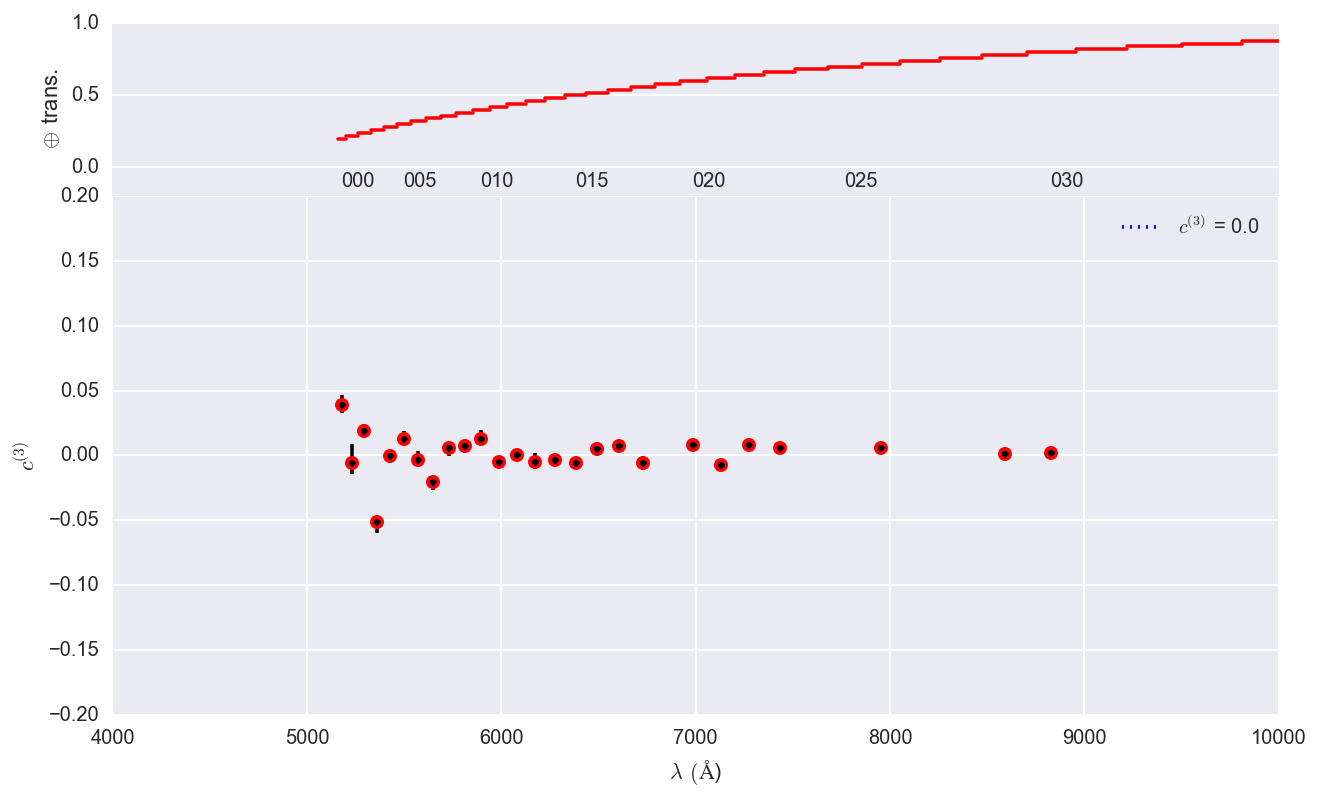

In [81]:
fig = plt.figure(figsize=(18, 6))
ax1 = fig.add_axes([0.35, 0.7, 0.45, 0.2],xticks=[], yticks=[0.0, 0.5, 1])
ax1.set_xlim(4000, 10000)
ax1.set_ylim(-0.2, 1)
ax1.set_ylabel('$\oplus$ trans.')
for i in range(N_orders):
    x = [orders.wl_start[i], orders.wl_end[i]]
    y = [0.2+0.02*i]*2
    ax1.plot(x, y, 'r-')
    
for i in range(N_orders):
    if (orders.number.values[i] % 5) == 0:
        ax1.text(orders.wl_center[i], -0.13, '{}'.format(orders.m_val.values[i]))

ax = fig.add_axes([0.35, 0.1, 0.45, 0.6])

this_mean = 0.0
this_label = "$c^{(3)}$" +" = {} ".format(this_mean)
ax.plot([10000, 30000], [this_mean]*2, 'b:', label=this_label)

x = merged.wl_center
y = merged.c3_50p
y05 = merged.c3_05p
y95 = merged.c3_95p
ax.plot(x, y, 'ro')
yerr1 = y - y05
yerr2 = y95 - y
ax.errorbar(x, y, yerr=[yerr1, yerr2], fmt='k.')


ax.set_ylim(-0.2, 0.2)
ax.set_xlim(4000, 10000)
ax.set_ylabel('$c^{(3)}}$')
ax.set_xlabel('$\lambda \,(\AA $)')
ax.legend(loc='best')

#plt.savefig('../document/figures/logg_vs_order.pdf', bbox_inches='tight')

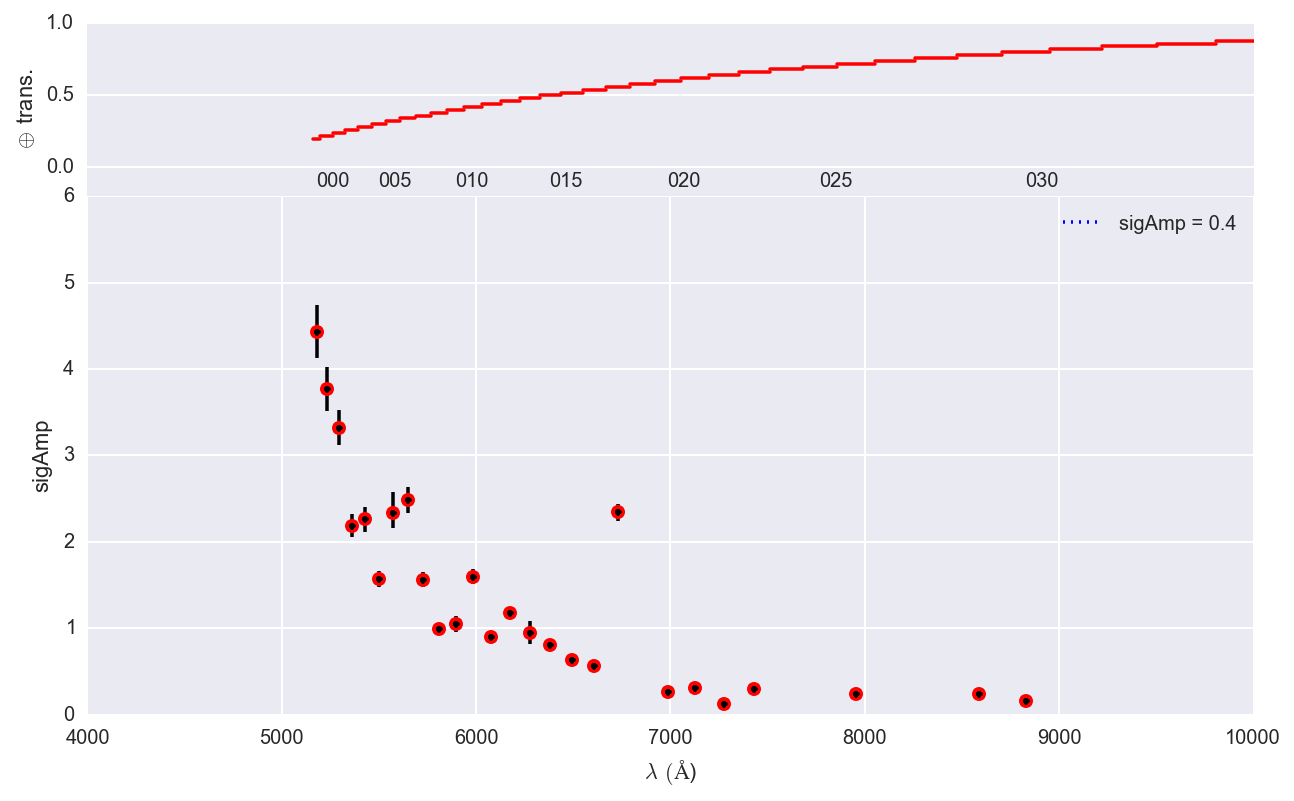

In [89]:
fig = plt.figure(figsize=(18, 6))
ax1 = fig.add_axes([0.35, 0.7, 0.45, 0.2],xticks=[], yticks=[0.0, 0.5, 1])
ax1.set_xlim(4000, 10000)
ax1.set_ylim(-0.2, 1)
ax1.set_ylabel('$\oplus$ trans.')
for i in range(N_orders):
    x = [orders.wl_start[i], orders.wl_end[i]]
    y = [0.2+0.02*i]*2
    ax1.plot(x, y, 'r-')
    
for i in range(N_orders):
    if (orders.number.values[i] % 5) == 0:
        ax1.text(orders.wl_center[i], -0.13, '{}'.format(orders.m_val.values[i]))

ax = fig.add_axes([0.35, 0.1, 0.45, 0.6])

this_mean = 0.4
this_label = "sigAmp" +" = {} ".format(this_mean)
ax.plot([10000, 30000], [this_mean]*2, 'b:', label=this_label)

x = merged.wl_center
y = merged.SA_50p
y05 = merged.SA_05p
y95 = merged.SA_95p
ax.plot(x, y, 'ro')
yerr1 = y - y05
yerr2 = y95 - y
ax.errorbar(x, y, yerr=[yerr1, yerr2], fmt='k.')


ax.set_ylim(0.0, 6.0)
ax.set_xlim(4000, 10000)
ax.set_ylabel('sigAmp')
ax.set_xlabel('$\lambda \,(\AA $)')
ax.legend(loc='best')

#plt.savefig('../document/figures/logg_vs_order.pdf', bbox_inches='tight')

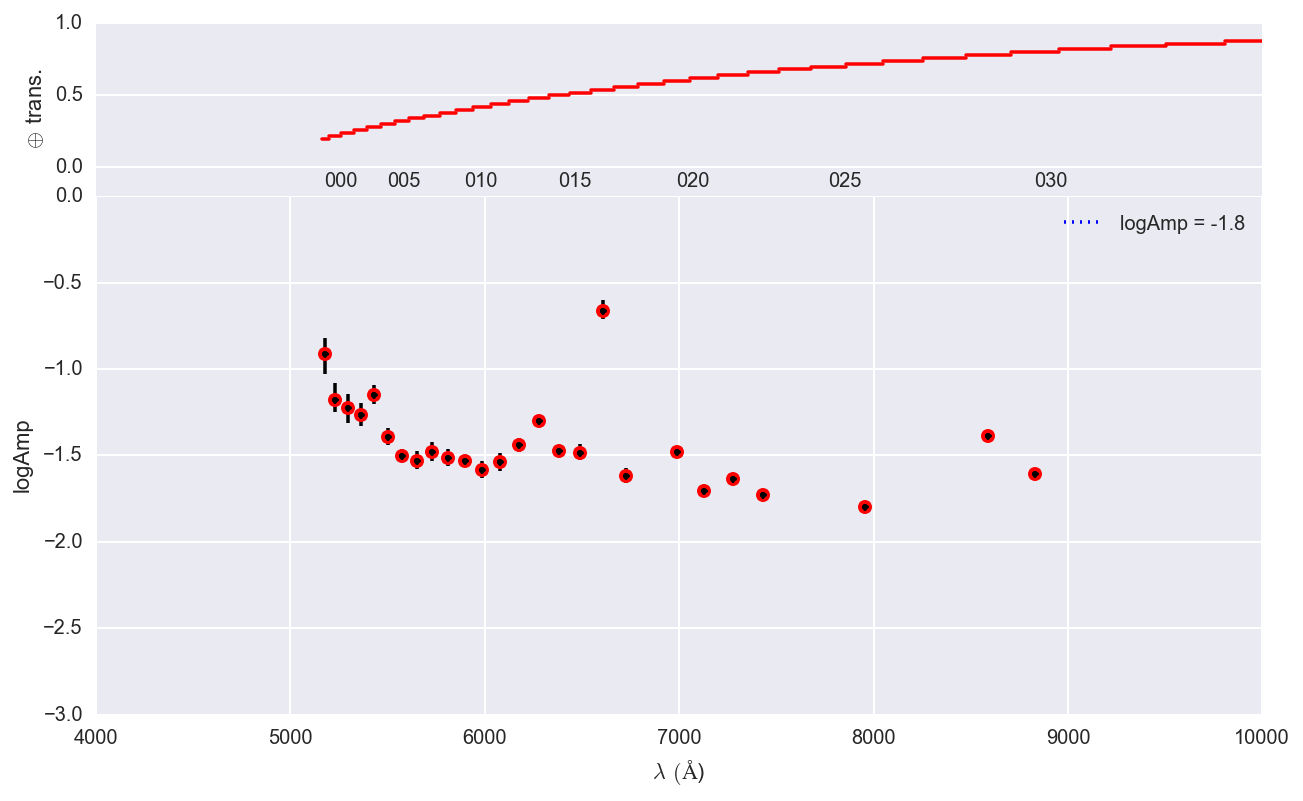

In [91]:
fig = plt.figure(figsize=(18, 6))
ax1 = fig.add_axes([0.35, 0.7, 0.45, 0.2],xticks=[], yticks=[0.0, 0.5, 1])
ax1.set_xlim(4000, 10000)
ax1.set_ylim(-0.2, 1)
ax1.set_ylabel('$\oplus$ trans.')
for i in range(N_orders):
    x = [orders.wl_start[i], orders.wl_end[i]]
    y = [0.2+0.02*i]*2
    ax1.plot(x, y, 'r-')
    
for i in range(N_orders):
    if (orders.number.values[i] % 5) == 0:
        ax1.text(orders.wl_center[i], -0.13, '{}'.format(orders.m_val.values[i]))

ax = fig.add_axes([0.35, 0.1, 0.45, 0.6])

this_mean = -1.8
this_label = "logAmp" +" = {} ".format(this_mean)
ax.plot([10000, 30000], [this_mean]*2, 'b:', label=this_label)

x = merged.wl_center
y = merged.LA_50p
y05 = merged.LA_05p
y95 = merged.LA_95p
ax.plot(x, y, 'ro')
yerr1 = y - y05
yerr2 = y95 - y
ax.errorbar(x, y, yerr=[yerr1, yerr2], fmt='k.')


ax.set_ylim(-3, 0.0)
ax.set_xlim(4000, 10000)
ax.set_ylabel('logAmp')
ax.set_xlabel('$\lambda \,(\AA $)')
ax.legend(loc='best')

#plt.savefig('../document/figures/logg_vs_order.pdf', bbox_inches='tight')

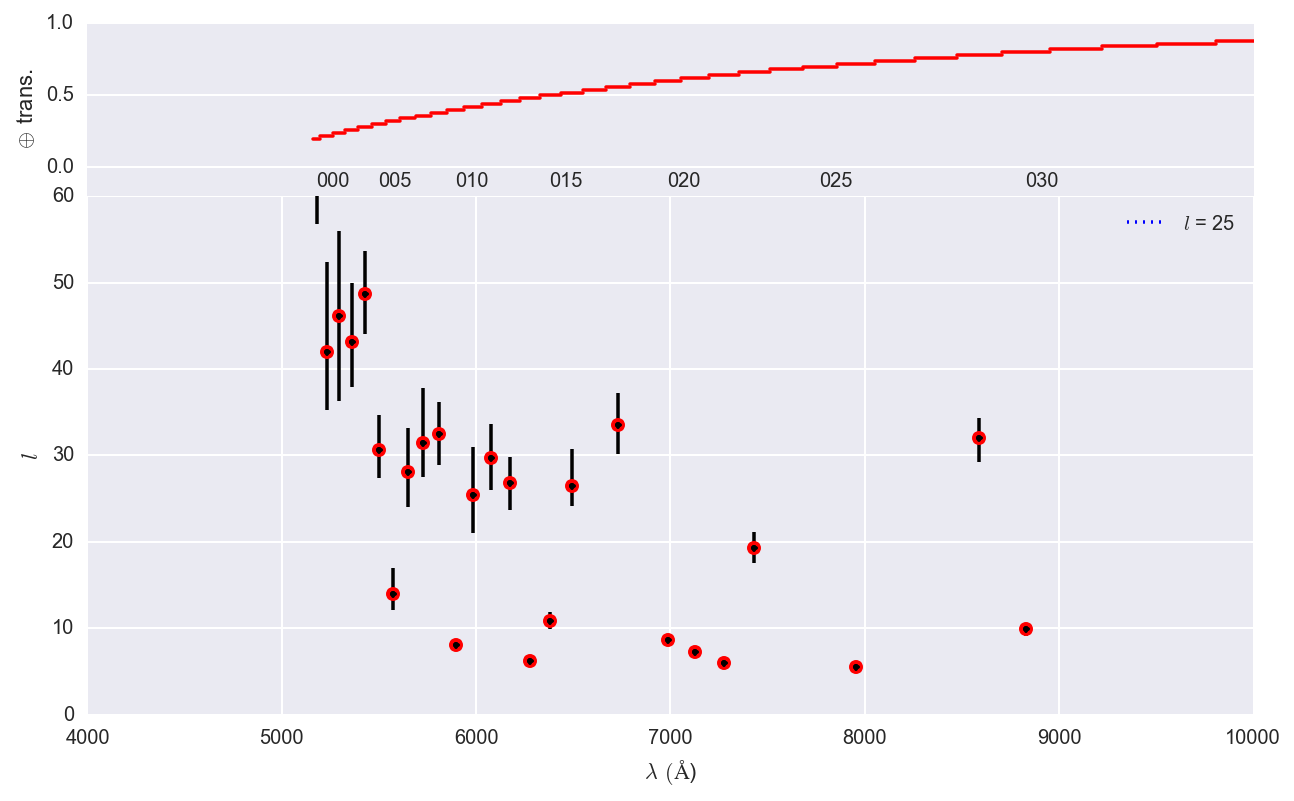

In [96]:
fig = plt.figure(figsize=(18, 6))
ax1 = fig.add_axes([0.35, 0.7, 0.45, 0.2],xticks=[], yticks=[0.0, 0.5, 1])
ax1.set_xlim(4000, 10000)
ax1.set_ylim(-0.2, 1)
ax1.set_ylabel('$\oplus$ trans.')
for i in range(N_orders):
    x = [orders.wl_start[i], orders.wl_end[i]]
    y = [0.2+0.02*i]*2
    ax1.plot(x, y, 'r-')
    
for i in range(N_orders):
    if (orders.number.values[i] % 5) == 0:
        ax1.text(orders.wl_center[i], -0.13, '{}'.format(orders.m_val.values[i]))

ax = fig.add_axes([0.35, 0.1, 0.45, 0.6])

this_mean = 25
this_label = "$l$" +" = {} ".format(this_mean)
ax.plot([10000, 30000], [this_mean]*2, 'b:', label=this_label)

x = merged.wl_center
y = merged.ll_50p
y05 = merged.ll_05p
y95 = merged.ll_95p
ax.plot(x, y, 'ro')
yerr1 = y - y05
yerr2 = y95 - y
ax.errorbar(x, y, yerr=[yerr1, yerr2], fmt='k.')


ax.set_ylim(0, 60)
ax.set_xlim(4000, 10000)
ax.set_ylabel('$l$')
ax.set_xlabel('$\lambda \,(\AA $)')
ax.legend(loc='best')

#plt.savefig('../document/figures/logg_vs_order.pdf', bbox_inches='tight')

Par-par plot

In [ ]:

#plt.subplot(211)
fig = plt.figure(figsize=(18, 6))

ax = fig.add_axes([0.35, 0.1, 0.45, 0.8])




ax.plot(merged.FeH_50p, merged.Teff_50p, 'ro')
yerr1 = merged.Teff_50p - merged.Teff_05p
yerr2 = merged.Teff_95p - merged.Teff_50p
xerr1 = merged.FeH_50p - merged.FeH_05p
xerr2 = merged.FeH_95p - merged.FeH_50p
ax.errorbar(merged.FeH_50p, merged.Teff_50p, yerr=[yerr1, yerr2], xerr=[xerr1, xerr2], fmt='k.')


ax.set_xlim(-0.5, 0.5)
ax.set_ylim(3000, 4500)
ax.set_ylabel('$T_{eff}$')
ax.set_xlabel('[Fe/H]')
ax.legend(loc='best')

#plt.savefig('../document/figures/logg_vs_order.pdf', bbox_inches='tight')

# Save the merged DataFrame

In [ ]:
merged.to_csv('../data/analysis/IGRINS_LkCa4_run02_last20kMCMC.csv', index=False)

The end for now.  